<a href="https://colab.research.google.com/github/Vikram12301/Time-Series-Classification-for-FordA/blob/main/FordA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
import numpy as np

In [2]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)
root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"
X_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
X_test, y_test = readucr(root_url + "FordA_TEST.tsv")

In [3]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [4]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [5]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)
    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    gap = keras.layers.GlobalAveragePooling1D()(conv3)
    output_layer = keras.layers.Dense(2, activation="softmax")(gap)
    return keras.models.Model(inputs=input_layer, outputs=output_layer)
model = make_model(input_shape=X_train.shape[1:])

In [6]:
epochs = 200
batch_size = 32

In [7]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

In [8]:
model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/200
90/90 [==============================] - 32s 19ms/step - loss: 0.5639 - accuracy: 0.7094 - val_loss: 0.7450 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 2/200
90/90 [==============================] - 1s 14ms/step - loss: 0.4595 - accuracy: 0.7694 - val_loss: 0.8235 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 3/200
90/90 [==============================] - 1s 14ms/step - loss: 0.4365 - accuracy: 0.7806 - val_loss: 0.7337 - val_accuracy: 0.4743 - lr: 0.0010
Epoch 4/200
90/90 [==============================] - 1s 14ms/step - loss: 0.4177 - accuracy: 0.7861 - val_loss: 0.6902 - val_accuracy: 0.5021 - lr: 0.0010
Epoch 5/200
90/90 [==============================] - 1s 14ms/step - loss: 0.4004 - accuracy: 0.7979 - val_loss: 0.6030 - val_accuracy: 0.6380 - lr: 0.0010
Epoch 6/200
90/90 [==============================] - 1s 14ms/step - loss: 0.3874 - accuracy: 0.8083 - val_loss: 0.5067 - val_accuracy: 0.6782 - lr: 0.0010
Epoch 7/200
90/90 [==============================] - 1s 14ms/step - l

In [11]:
model = keras.models.load_model("best_model.h5")
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy", test_acc)
print("Test loss", test_loss)

42/42 [==============================] - 1s 8ms/step - loss: 0.0958 - accuracy: 0.9720
Test accuracy 0.971969723701477
Test loss 0.09582030028104782


In [12]:
import matplotlib.pyplot as plt

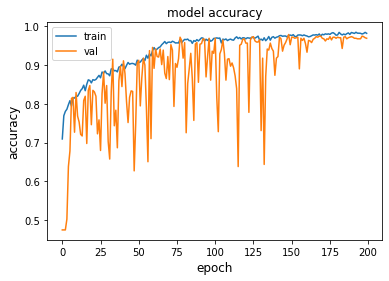

In [13]:
metric = "accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric)
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="best")
plt.show()